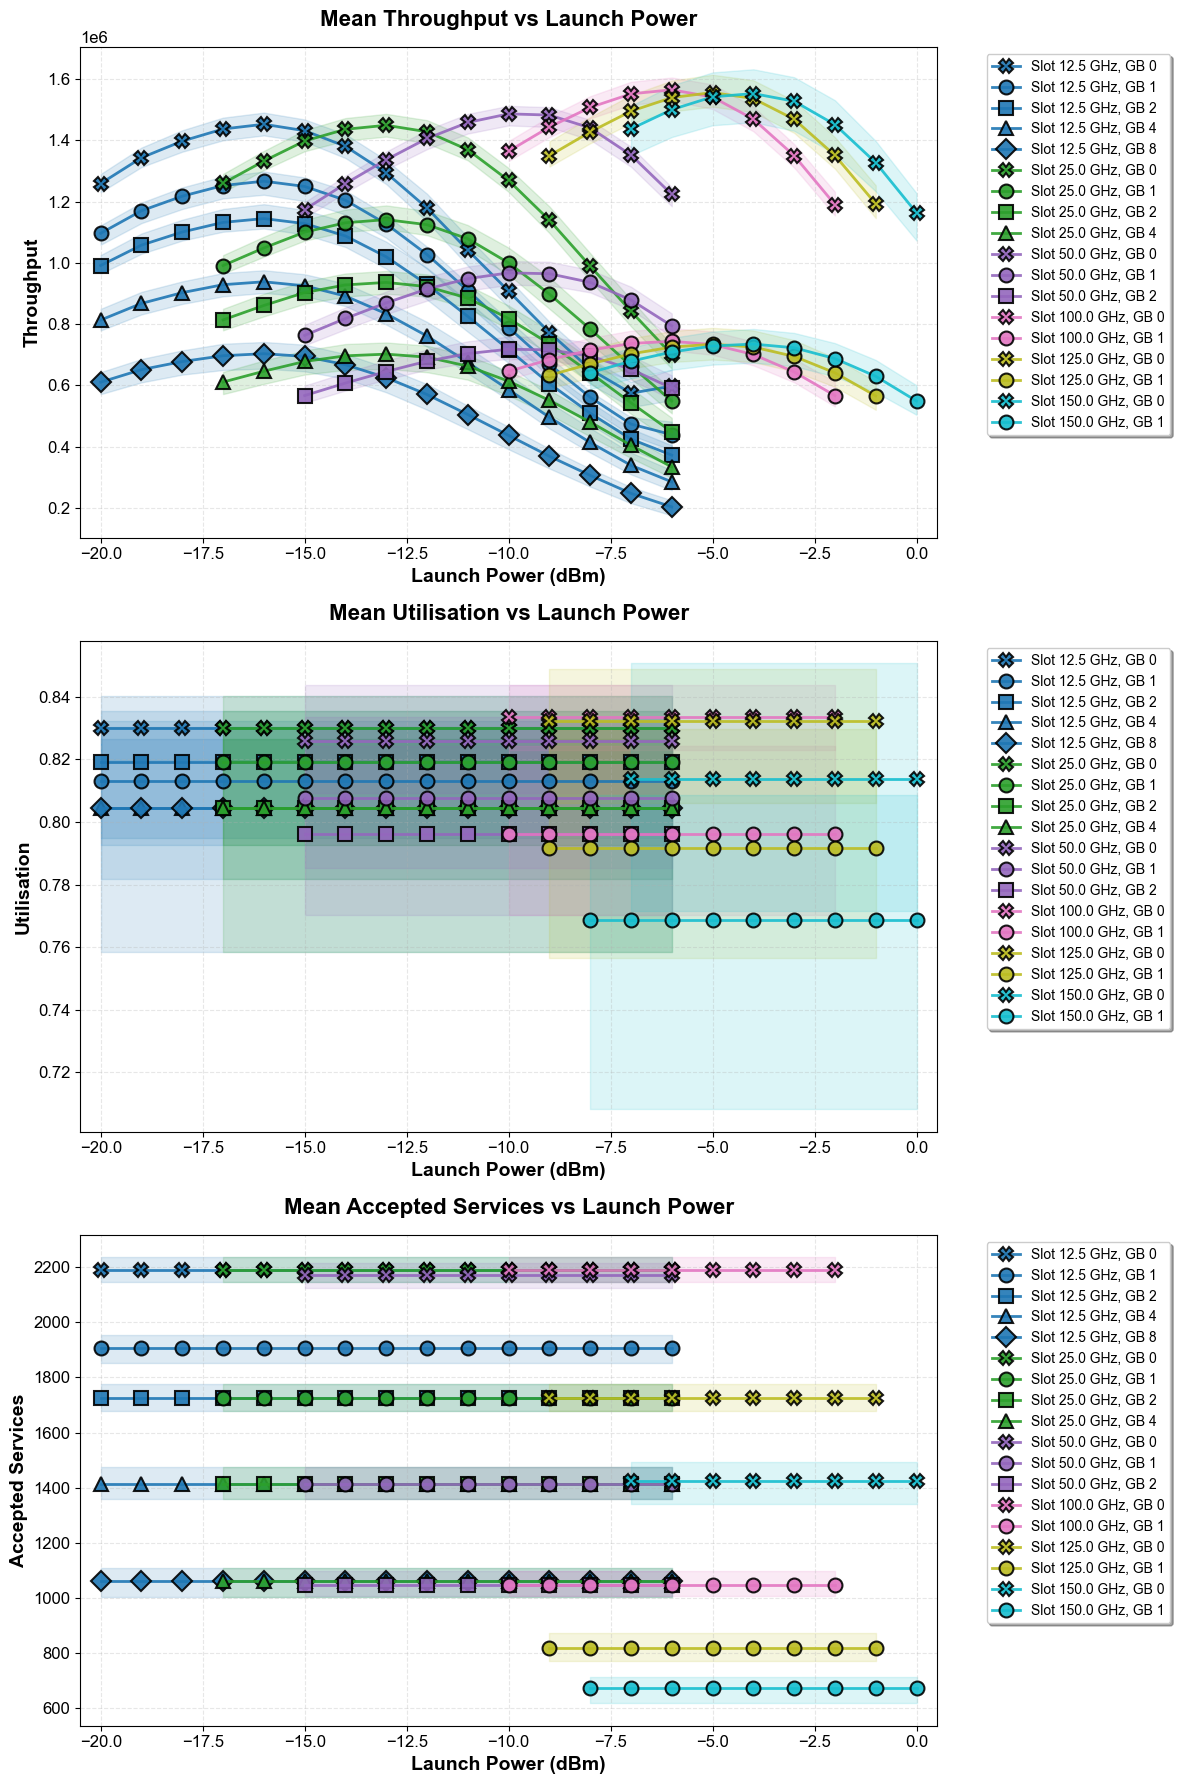


Data Summary:
Unique slot sizes: [12.5, 25.0, 50.0, 100.0, 125.0, 150.0]
Unique guardbands: [0, 1, 2, 4, 8]
Launch power range: -20 to 0 dBm
Number of data points: 207


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# File path
filepath = '/Users/michaeldoherty/git/XLRON/experiment_data/ISRSGN2025/nsfnet_throughput_data.csv'

# Read the CSV
df = pd.read_csv(filepath)

# Set up custom fonts and plot style
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']
rcParams['font.size'] = 12
rcParams['axes.titlesize'] = 16
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['legend.fontsize'] = 10
rcParams['figure.titlesize'] = 18
rcParams['lines.linewidth'] = 2
rcParams['axes.grid'] = True
rcParams['grid.alpha'] = 0.3
rcParams['grid.linestyle'] = '--'

# Get unique values
slot_sizes = sorted(df['slot_size'].unique())
guardbands = sorted(df['guardband'].unique())

# Define colors for different slot sizes
colors = plt.cm.tab10(np.linspace(0, 1, len(slot_sizes)))
color_map = dict(zip(slot_sizes, colors))

# Define markers for different guardbands (including X marker)
markers = ['X', 'o', 's', '^', 'D', 'v', 'P', '*', 'h', '<']
marker_map = dict(zip(guardbands, markers[:len(guardbands)]))

# Create figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))

# Function to plot data with min/max shading
def plot_metric(ax, metric_base, ylabel, title):
    # Track what we've already labeled to avoid duplicate legend entries
    labeled_combinations = set()

    for slot_size in slot_sizes:
        df_slot = df[df['slot_size'] == slot_size]

        for guardband in guardbands:
            df_gb = df_slot[df_slot['guardband'] == guardband]

            if not df_gb.empty:
                # Sort by launch power
                df_gb = df_gb.sort_values('launch_power')

                # Create label
                label_key = (slot_size, guardband)
                if label_key not in labeled_combinations:
                    label = f'Slot {slot_size} GHz, GB {guardband}'
                    labeled_combinations.add(label_key)
                else:
                    label = None

                # Plot mean line with marker
                ax.plot(df_gb['launch_power'],
                       df_gb[f'{metric_base}.mean'],
                       color=color_map[slot_size],
                       marker=marker_map[guardband],
                       markersize=10,
                       markeredgewidth=1.5,
                       markeredgecolor='black',
                       label=label,
                       alpha=0.9)

                # Add shaded area for min/max
                ax.fill_between(df_gb['launch_power'],
                               df_gb[f'{metric_base}.min'],
                               df_gb[f'{metric_base}.max'],
                               color=color_map[slot_size],
                               alpha=0.15)

    ax.set_xlabel('Launch Power (dBm)', fontweight='bold')
    ax.set_ylabel(ylabel, fontweight='bold')
    ax.set_title(title, fontweight='bold', pad=15)

    # Adjust legend position and style
    if ax.get_legend_handles_labels()[0]:  # Check if there are legend entries
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
                 frameon=True, fancybox=True, shadow=True)

    ax.grid(True, alpha=0.3)

    # Set x-axis to show negative values properly
    x_min = df['launch_power'].min()
    x_max = df['launch_power'].max()
    ax.set_xlim(x_min - 0.5, x_max + 0.5)

# Plot 1: Throughput
plot_metric(ax1, 'throughput_episode_end_mean',
           'Throughput',
           'Mean Throughput vs Launch Power')

# Plot 2: Utilisation (note: British spelling in your data)
plot_metric(ax2, 'utilisation_episode_end_mean',
           'Utilisation',
           'Mean Utilisation vs Launch Power')

# Plot 3: Accepted Services
plot_metric(ax3, 'accepted_services_episode_end_mean',
           'Accepted Services',
           'Mean Accepted Services vs Launch Power')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

# Optional: Save the figure
# plt.savefig('network_performance_metrics.png', dpi=300, bbox_inches='tight')

# Print some info about the data
print("\nData Summary:")
print(f"Unique slot sizes: {sorted(df['slot_size'].unique())}")
print(f"Unique guardbands: {sorted(df['guardband'].unique())}")
print(f"Launch power range: {df['launch_power'].min()} to {df['launch_power'].max()} dBm")
print(f"Number of data points: {len(df)}")

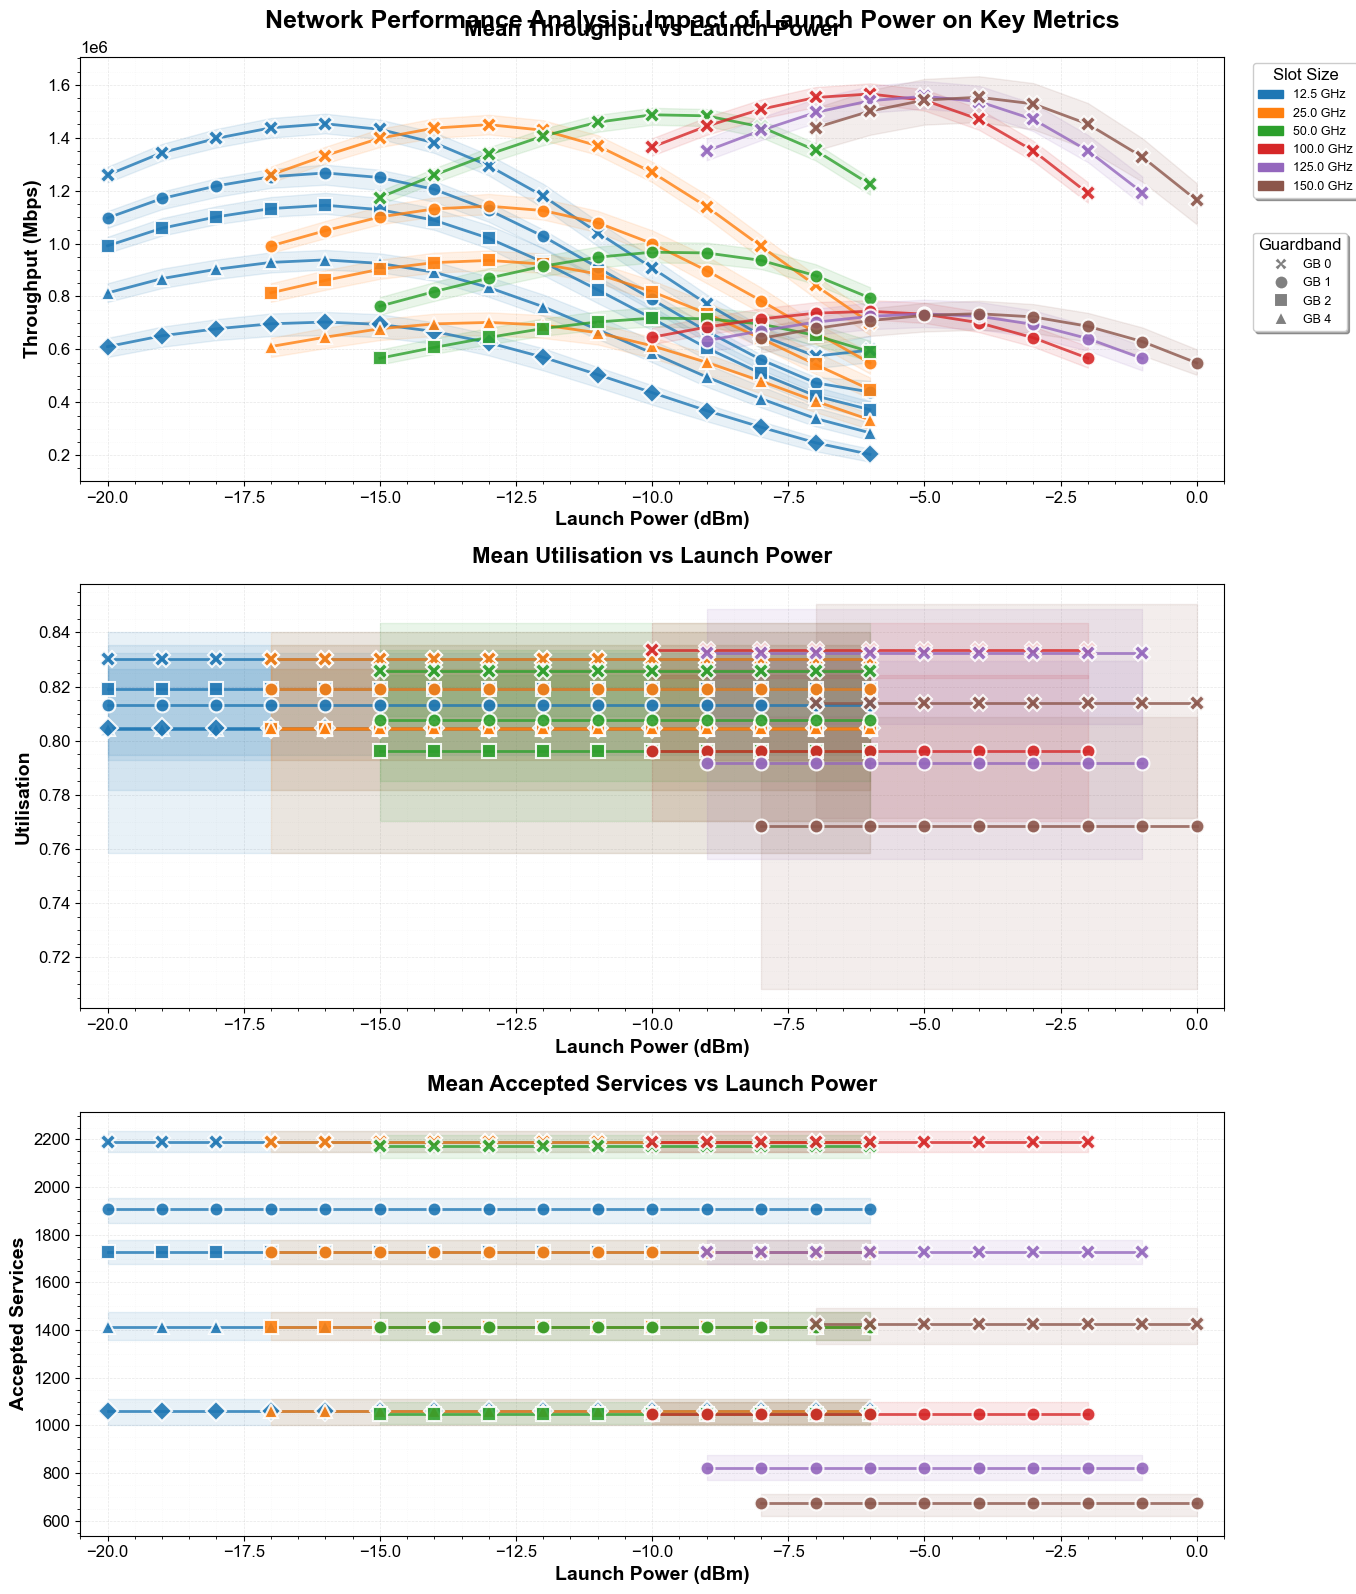


Summary Statistics:
--------------------------------------------------

Throughput:
  Overall range: 175110.44 - 1632107.50
  Mean range: 202972.85 - 1565153.42

Utilisation:
  Overall range: 0.71 - 0.85
  Mean range: 0.77 - 0.83

Accepted Services:
  Overall range: 618.00 - 2236.00
  Mean range: 672.73 - 2191.00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
import matplotlib.patches as mpatches

# File path
filepath = '/Users/michaeldoherty/git/XLRON/experiment_data/ISRSGN2025/nsfnet_throughput_data.csv'

# Read the CSV
df = pd.read_csv(filepath)

# Set up custom fonts and plot style
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']
rcParams['font.size'] = 12
rcParams['axes.titlesize'] = 16
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['legend.fontsize'] = 9
rcParams['figure.titlesize'] = 18
rcParams['lines.linewidth'] = 2.5
rcParams['axes.grid'] = True
rcParams['grid.alpha'] = 0.3
rcParams['grid.linestyle'] = '--'

# Get unique values and sort them
slot_sizes = sorted(df['slot_size'].unique())
guardbands = sorted(df['guardband'].unique())

# Define a better color palette with more distinct colors
# Using a combination of colors that are more distinguishable
color_palette = [
    '#1f77b4',  # blue
    '#ff7f0e',  # orange
    '#2ca02c',  # green
    '#d62728',  # red
    '#9467bd',  # purple
    '#8c564b',  # brown
    '#e377c2',  # pink
    '#7f7f7f',  # gray
    '#bcbd22',  # olive
    '#17becf'   # cyan
]

# Extend palette if needed
if len(slot_sizes) > len(color_palette):
    additional_colors = plt.cm.tab20(np.linspace(0, 1, len(slot_sizes) - len(color_palette)))
    color_palette.extend([plt.colors.rgb2hex(c) for c in additional_colors])

color_map = dict(zip(slot_sizes, color_palette[:len(slot_sizes)]))

# Define markers - ensure X is prominent
markers = ['X', 'o', 's', '^', 'D', 'v', 'P', '*', 'h', '<']
marker_sizes = [12, 10, 10, 10, 10, 10, 10, 12, 10, 10]  # Make X and * slightly larger
marker_map = dict(zip(guardbands, markers[:len(guardbands)]))
size_map = dict(zip(guardbands, marker_sizes[:len(guardbands)]))

# Create figure with three subplots
fig = plt.figure(figsize=(14, 16))

# Create subplots with more space between them
ax1 = plt.subplot(3, 1, 1)
ax2 = plt.subplot(3, 1, 2)
ax3 = plt.subplot(3, 1, 3)

# Function to plot data with improved styling
def plot_metric(ax, metric_base, ylabel, title, y_units=''):
    # Group by slot size first for better visual organization
    slot_groups = {}

    for slot_size in slot_sizes:
        df_slot = df[df['slot_size'] == slot_size]
        slot_groups[slot_size] = {}

        for guardband in guardbands:
            df_gb = df_slot[df_slot['guardband'] == guardband]
            if not df_gb.empty:
                df_gb = df_gb.sort_values('launch_power')
                slot_groups[slot_size][guardband] = df_gb

    # Plot lines first (without markers) for better continuity
    for slot_size in slot_sizes:
        for guardband in guardbands:
            if guardband in slot_groups[slot_size]:
                df_gb = slot_groups[slot_size][guardband]

                # Plot line without markers
                ax.plot(df_gb['launch_power'],
                       df_gb[f'{metric_base}.mean'],
                       color=color_map[slot_size],
                       alpha=0.8,
                       linewidth=2)

                # Add shaded area for min/max
                ax.fill_between(df_gb['launch_power'],
                               df_gb[f'{metric_base}.min'],
                               df_gb[f'{metric_base}.max'],
                               color=color_map[slot_size],
                               alpha=0.1)

    # Then add markers on top
    for slot_size in slot_sizes:
        for guardband in guardbands:
            if guardband in slot_groups[slot_size]:
                df_gb = slot_groups[slot_size][guardband]

                # Plot markers only
                ax.plot(df_gb['launch_power'],
                       df_gb[f'{metric_base}.mean'],
                       color=color_map[slot_size],
                       marker=marker_map[guardband],
                       markersize=size_map[guardband],
                       markeredgewidth=1.5,
                       markeredgecolor='white',
                       linestyle='none',
                       alpha=0.9)

    # Improved axis labels
    ax.set_xlabel('Launch Power (dBm)', fontweight='bold', fontsize=14)
    ax.set_ylabel(f'{ylabel}{y_units}', fontweight='bold', fontsize=14)
    ax.set_title(title, fontweight='bold', pad=15, fontsize=16)

    # Improve grid
    ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
    ax.set_axisbelow(True)

    # Set axis limits with some padding
    x_min, x_max = df['launch_power'].min(), df['launch_power'].max()
    ax.set_xlim(x_min - 0.5, x_max + 0.5)

    # Add minor gridlines
    ax.minorticks_on()
    ax.grid(which='minor', alpha=0.1, linestyle=':', linewidth=0.5)

# Plot 1: Throughput
plot_metric(ax1, 'throughput_episode_end_mean',
           'Throughput',
           'Mean Throughput vs Launch Power',
           ' (Mbps)')

# Plot 2: Utilisation
plot_metric(ax2, 'utilisation_episode_end_mean',
           'Utilisation',
           'Mean Utilisation vs Launch Power',
           '')

# Plot 3: Accepted Services
plot_metric(ax3, 'accepted_services_episode_end_mean',
           'Accepted Services',
           'Mean Accepted Services vs Launch Power',
           '')

# Create a custom legend with two parts: slot sizes and guardbands
# This goes outside the loop, after all plots are created

# Create legend for slot sizes (colors)
slot_handles = []
for slot_size in slot_sizes[:6]:  # First 6 slot sizes
    patch = mpatches.Patch(color=color_map[slot_size], label=f'{slot_size} GHz')
    slot_handles.append(patch)

# Create legend for guardbands (markers)
gb_handles = []
for guardband in guardbands[:4]:  # First 4 guardbands
    line = plt.Line2D([0], [0], marker=marker_map[guardband], color='gray',
                      linewidth=0, markersize=10, markeredgewidth=1.5,
                      markeredgecolor='white', label=f'GB {guardband}')
    gb_handles.append(line)

# Add legends to the first subplot
legend1 = ax1.legend(handles=slot_handles, loc='upper left', bbox_to_anchor=(1.02, 1),
                     title='Slot Size', frameon=True, fancybox=True, shadow=True)
legend2 = ax1.legend(handles=gb_handles, loc='upper left', bbox_to_anchor=(1.02, 0.6),
                     title='Guardband', frameon=True, fancybox=True, shadow=True)
ax1.add_artist(legend1)  # Add first legend back

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(right=0.88)  # Make room for legends

# Add a super title
fig.suptitle('Network Performance Analysis: Impact of Launch Power on Key Metrics',
             fontsize=18, fontweight='bold', y=0.995)

# Show the plots
plt.show()

# Optional: Save with high DPI
# plt.savefig('network_performance_metrics_improved.png', dpi=300, bbox_inches='tight')

# Print summary statistics
print("\nSummary Statistics:")
print("-" * 50)
for metric, name in [('throughput_episode_end_mean', 'Throughput'),
                     ('utilisation_episode_end_mean', 'Utilisation'),
                     ('accepted_services_episode_end_mean', 'Accepted Services')]:
    print(f"\n{name}:")
    print(f"  Overall range: {df[f'{metric}.min'].min():.2f} - {df[f'{metric}.max'].max():.2f}")
    print(f"  Mean range: {df[f'{metric}.mean'].min():.2f} - {df[f'{metric}.mean'].max():.2f}")

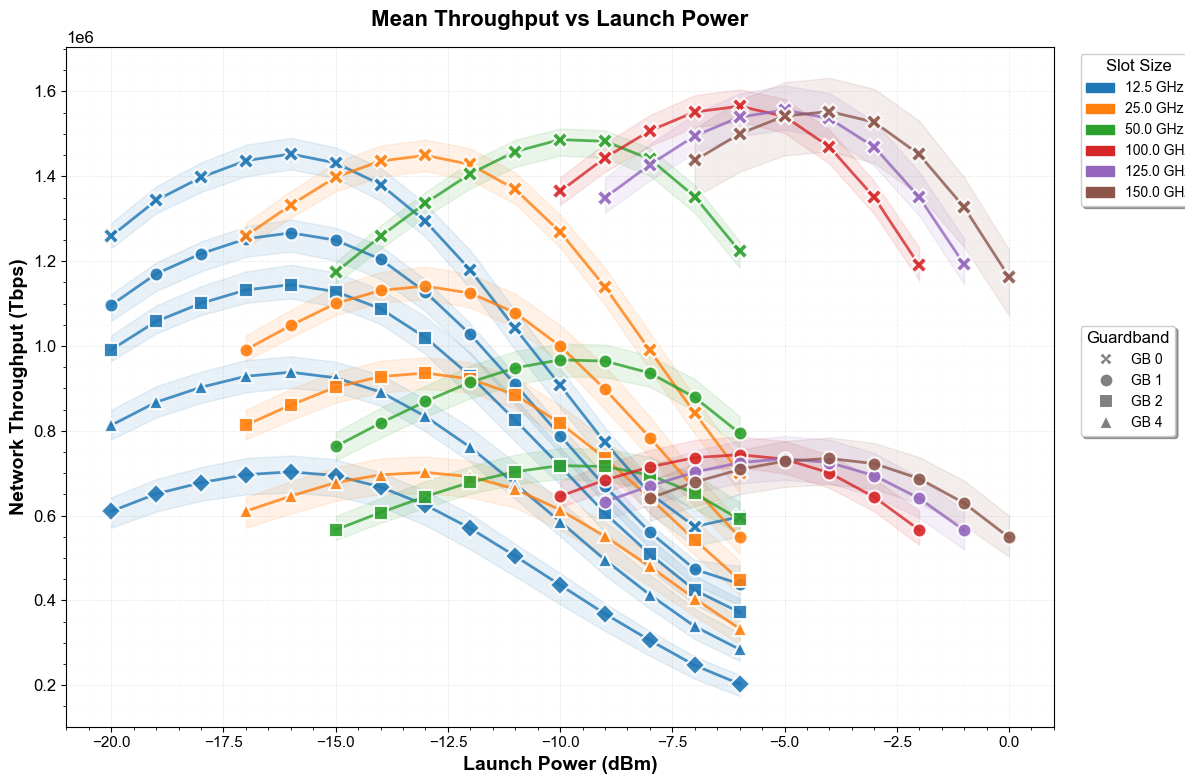

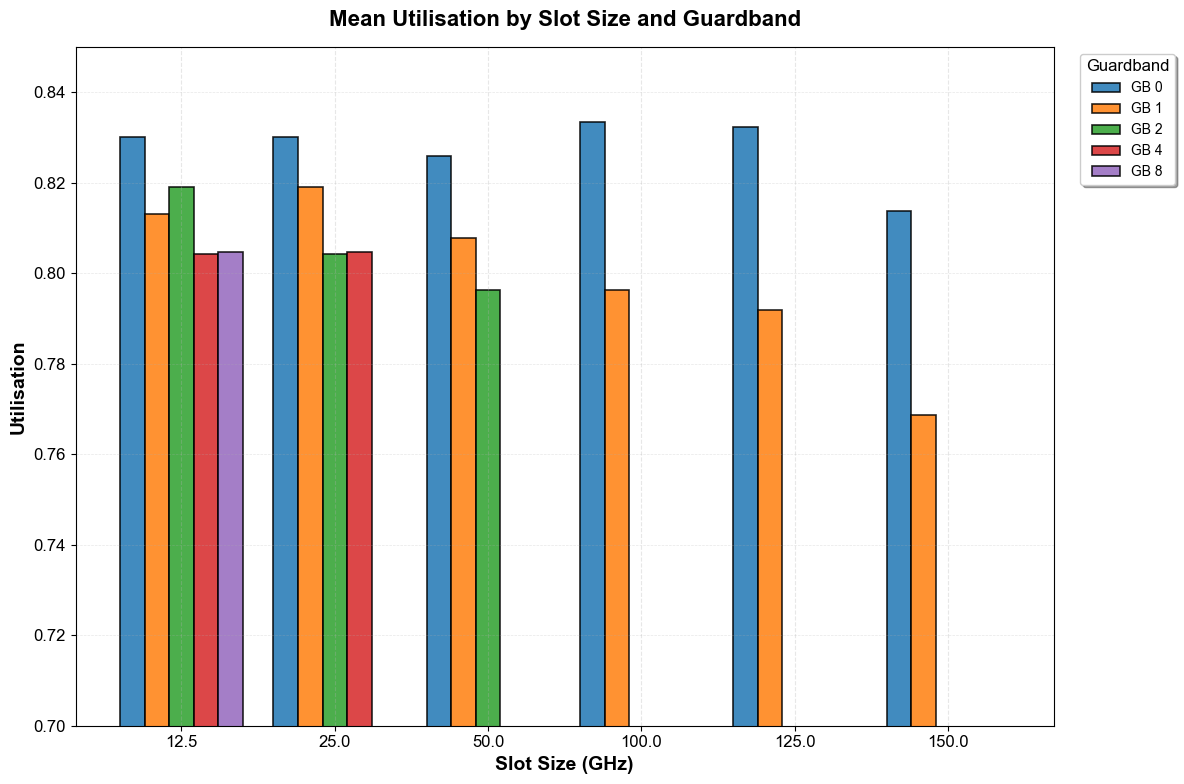

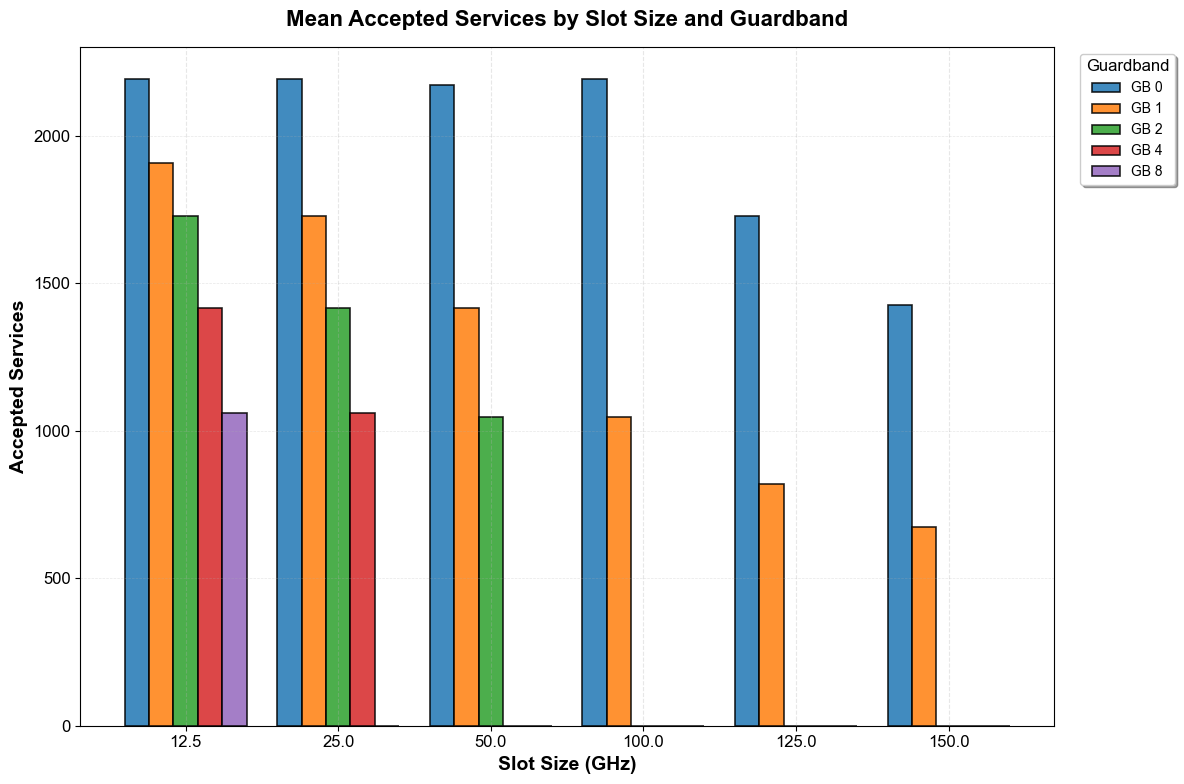


Utilisation Summary (averaged across all launch powers):
guardband         0         1         2         4         8
slot_size                                                  
12.5       0.830083  0.813166  0.819026  0.804340  0.804611
25.0       0.830083  0.819026  0.804340  0.804611       NaN
50.0       0.825826  0.807674  0.796219       NaN       NaN
100.0      0.833416  0.796219       NaN       NaN       NaN
125.0      0.832359  0.791768       NaN       NaN       NaN
150.0      0.813837  0.768624       NaN       NaN       NaN

Accepted Services Summary (averaged across all launch powers):
guardband            0            1            2            4            8
slot_size                                                                 
12.5       2191.000000  1907.846154  1726.000000  1415.058824  1061.173913
25.0       2191.000000  1726.000000  1415.058824  1061.173913          NaN
50.0       2171.272727  1415.058824  1046.478261          NaN          NaN
100.0      2191.000000 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
import matplotlib.patches as mpatches

# File path
filepath = '/Users/michaeldoherty/git/XLRON/experiment_data/ISRSGN2025/nsfnet_throughput_data.csv'

# Read the CSV
df = pd.read_csv(filepath)

# Set up custom fonts and plot style
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']
rcParams['font.size'] = 12
rcParams['axes.titlesize'] = 16
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 11
rcParams['ytick.labelsize'] = 12
rcParams['legend.fontsize'] = 10
rcParams['figure.titlesize'] = 18
rcParams['lines.linewidth'] = 2.5
rcParams['axes.grid'] = True
rcParams['grid.alpha'] = 0.3
rcParams['grid.linestyle'] = '--'

# Get unique values and sort them
slot_sizes = sorted(df['slot_size'].unique())
guardbands = sorted(df['guardband'].unique())

# Define color palette for GUARDBANDS (for bar charts)
gb_color_palette = [
    '#1f77b4',  # blue
    '#ff7f0e',  # orange
    '#2ca02c',  # green
    '#d62728',  # red
    '#9467bd',  # purple
    '#8c564b',  # brown
    '#e377c2',  # pink
    '#7f7f7f',  # gray
    '#bcbd22',  # olive
    '#17becf'   # cyan
]
gb_color_map = dict(zip(guardbands, gb_color_palette[:len(guardbands)]))

# Define color palette for SLOT SIZES (for line plot)
slot_color_palette = [
    '#1f77b4',  # blue
    '#ff7f0e',  # orange
    '#2ca02c',  # green
    '#d62728',  # red
    '#9467bd',  # purple
    '#8c564b',  # brown
    '#e377c2',  # pink
    '#7f7f7f',  # gray
    '#bcbd22',  # olive
    '#17becf'   # cyan
]

if len(slot_sizes) > len(slot_color_palette):
    additional_colors = plt.cm.tab20(np.linspace(0, 1, len(slot_sizes) - len(slot_color_palette)))
    slot_color_palette.extend([plt.colors.rgb2hex(c) for c in additional_colors])

slot_color_map = dict(zip(slot_sizes, slot_color_palette[:len(slot_sizes)]))

# Define markers for line plot
markers = ['X', 'o', 's', '^', 'D', 'v', 'P', '*', 'h', '<']
marker_sizes = [12, 10, 10, 10, 10, 10, 10, 12, 10, 10]
marker_map = dict(zip(guardbands, markers[:len(guardbands)]))
size_map = dict(zip(guardbands, marker_sizes[:len(guardbands)]))

# PLOT 1: Throughput vs Launch Power (Line Plot)
plt.figure(figsize=(12, 8))

# Group by slot size first
for slot_size in slot_sizes:
    df_slot = df[df['slot_size'] == slot_size]

    for guardband in guardbands:
        df_gb = df_slot[df_slot['guardband'] == guardband]
        if not df_gb.empty:
            df_gb = df_gb.sort_values('launch_power')

            # Plot line
            plt.plot(df_gb['launch_power'],
                    df_gb['throughput_episode_end_mean.mean'],
                    color=slot_color_map[slot_size],
                    alpha=0.8,
                    linewidth=2)

            # Add shaded area
            plt.fill_between(df_gb['launch_power'],
                           df_gb['throughput_episode_end_mean.min'],
                           df_gb['throughput_episode_end_mean.max'],
                           color=slot_color_map[slot_size],
                           alpha=0.1)

# Add markers on top
for slot_size in slot_sizes:
    df_slot = df[df['slot_size'] == slot_size]

    for guardband in guardbands:
        df_gb = df_slot[df_slot['guardband'] == guardband]
        if not df_gb.empty:
            df_gb = df_gb.sort_values('launch_power')

            plt.plot(df_gb['launch_power'],
                    df_gb['throughput_episode_end_mean.mean'],
                    color=slot_color_map[slot_size],
                    marker=marker_map[guardband],
                    markersize=size_map[guardband],
                    markeredgewidth=1.5,
                    markeredgecolor='white',
                    linestyle='none',
                    alpha=0.9)

plt.xlabel('Launch Power (dBm)', fontweight='bold', fontsize=14)
plt.ylabel('Network Throughput (Tbps)', fontweight='bold', fontsize=14)
plt.title('Mean Throughput vs Launch Power', fontweight='bold', fontsize=16, pad=15)
plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor', alpha=0.1, linestyle=':', linewidth=0.5)

# Create custom legends for line plot
slot_handles = [mpatches.Patch(color=slot_color_map[slot_size], label=f'{slot_size} GHz')
                for slot_size in slot_sizes[:6]]
gb_handles = [plt.Line2D([0], [0], marker=marker_map[guardband], color='gray',
                        linewidth=0, markersize=10, markeredgewidth=1.5,
                        markeredgecolor='white', label=f'GB {guardband}')
              for guardband in guardbands[:4]]

legend1 = plt.legend(handles=slot_handles, loc='upper left', bbox_to_anchor=(1.02, 1),
                     title='Slot Size', frameon=True, fancybox=True, shadow=True)
legend2 = plt.legend(handles=gb_handles, loc='upper left', bbox_to_anchor=(1.02, 0.6),
                     title='Guardband', frameon=True, fancybox=True, shadow=True)
plt.gca().add_artist(legend1)

plt.tight_layout()
plt.show()

# PLOT 2: Utilisation (Bar Chart)
# Get average utilisation for each slot_size/guardband combination
util_data = df.groupby(['slot_size', 'guardband'])['utilisation_episode_end_mean.mean'].mean().reset_index()

plt.figure(figsize=(12, 8))

# Create x positions for bars
n_slots = len(slot_sizes)
n_gb = len(guardbands)
bar_width = 0.8 / n_gb
x_base = np.arange(n_slots)

# Plot bars for each guardband
for i, guardband in enumerate(guardbands):
    gb_data = util_data[util_data['guardband'] == guardband]

    # Ensure data is aligned with slot_sizes order
    values = []
    for slot in slot_sizes:
        val = gb_data[gb_data['slot_size'] == slot]['utilisation_episode_end_mean.mean'].values
        values.append(val[0] if len(val) > 0 else 0)

    x_pos = x_base + i * bar_width

    bars = plt.bar(x_pos, values, bar_width,
                    color=gb_color_map[guardband],
                    edgecolor='black',
                    linewidth=1.2,
                    alpha=0.85,
                    label=f'GB {guardband}')

plt.xlabel('Slot Size (GHz)', fontweight='bold', fontsize=14)
plt.ylabel('Utilisation', fontweight='bold', fontsize=14)
plt.title('Mean Utilisation by Slot Size and Guardband', fontweight='bold', fontsize=16, pad=15)
plt.xticks(x_base + bar_width * (n_gb-1) / 2, [f'{s}' for s in slot_sizes], fontsize=12)
plt.grid(True, axis='y', alpha=0.3, linestyle='--', linewidth=0.5)
plt.ylim(0.7, 0.85)  # Adjust based on your data range

# Single legend for guardbands
plt.legend(title='Guardband', frameon=True, fancybox=True, shadow=True,
           loc='upper left', bbox_to_anchor=(1.02, 1))

plt.tight_layout()
#plt.show()

# PLOT 3: Accepted Services (Bar Chart)
# Get average accepted services for each slot_size/guardband combination
services_data = df.groupby(['slot_size', 'guardband'])['accepted_services_episode_end_mean.mean'].mean().reset_index()

plt.figure(figsize=(12, 8))

# Plot bars for each guardband
for i, guardband in enumerate(guardbands):
    gb_data = services_data[services_data['guardband'] == guardband]

    # Ensure data is aligned with slot_sizes order
    values = []
    for slot in slot_sizes:
        val = gb_data[gb_data['slot_size'] == slot]['accepted_services_episode_end_mean.mean'].values
        values.append(val[0] if len(val) > 0 else 0)

    x_pos = x_base + i * bar_width

    bars = plt.bar(x_pos, values, bar_width,
                    color=gb_color_map[guardband],
                    edgecolor='black',
                    linewidth=1.2,
                    alpha=0.85,
                    label=f'GB {guardband}')

plt.xlabel('Slot Size (GHz)', fontweight='bold', fontsize=14)
plt.ylabel('Accepted Services', fontweight='bold', fontsize=14)
plt.title('Mean Accepted Services by Slot Size and Guardband', fontweight='bold', fontsize=16, pad=15)
plt.xticks(x_base + bar_width * (n_gb-1) / 2, [f'{s}' for s in slot_sizes], fontsize=12)
plt.grid(True, axis='y', alpha=0.3, linestyle='--', linewidth=0.5)

# Single legend for guardbands
plt.legend(title='Guardband', frameon=True, fancybox=True, shadow=True,
           loc='upper left', bbox_to_anchor=(1.02, 1))

plt.tight_layout()
plt.show()

# Print summary of the bar chart data
print("\nUtilisation Summary (averaged across all launch powers):")
print(util_data.pivot(index='slot_size', columns='guardband', values='utilisation_episode_end_mean.mean'))

print("\nAccepted Services Summary (averaged across all launch powers):")
print(services_data.pivot(index='slot_size', columns='guardband', values='accepted_services_episode_end_mean.mean'))


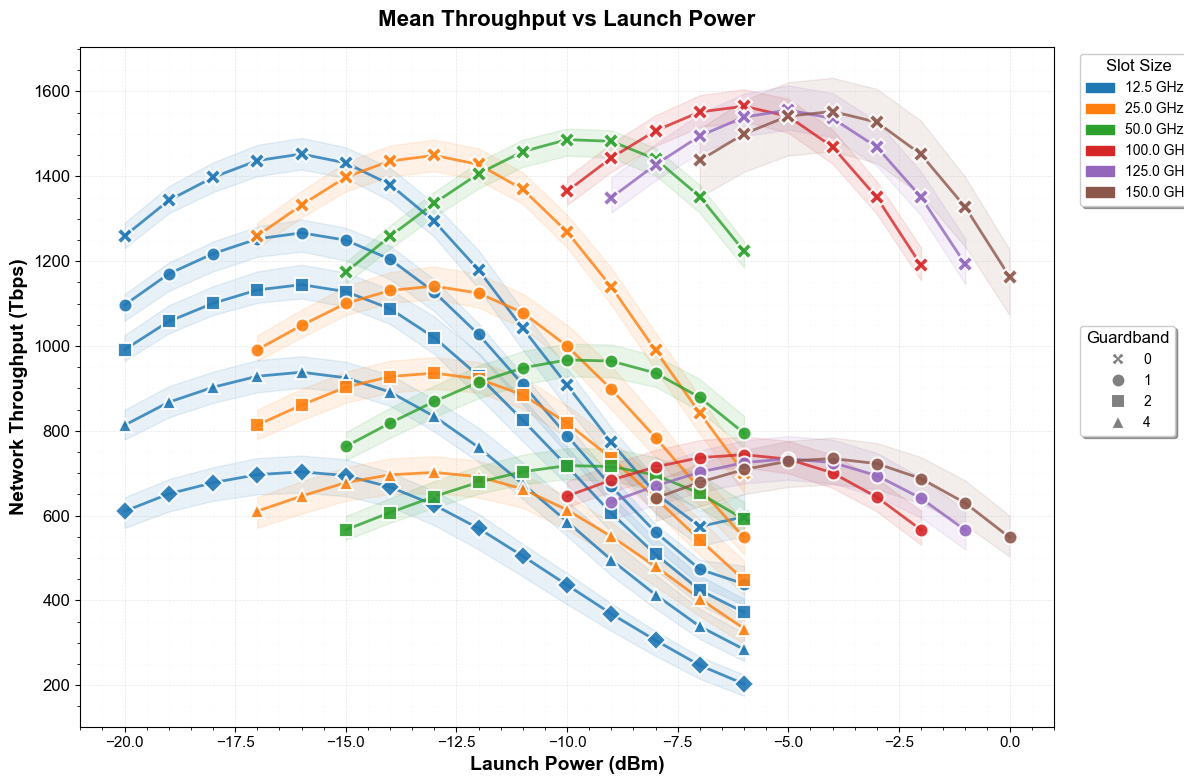

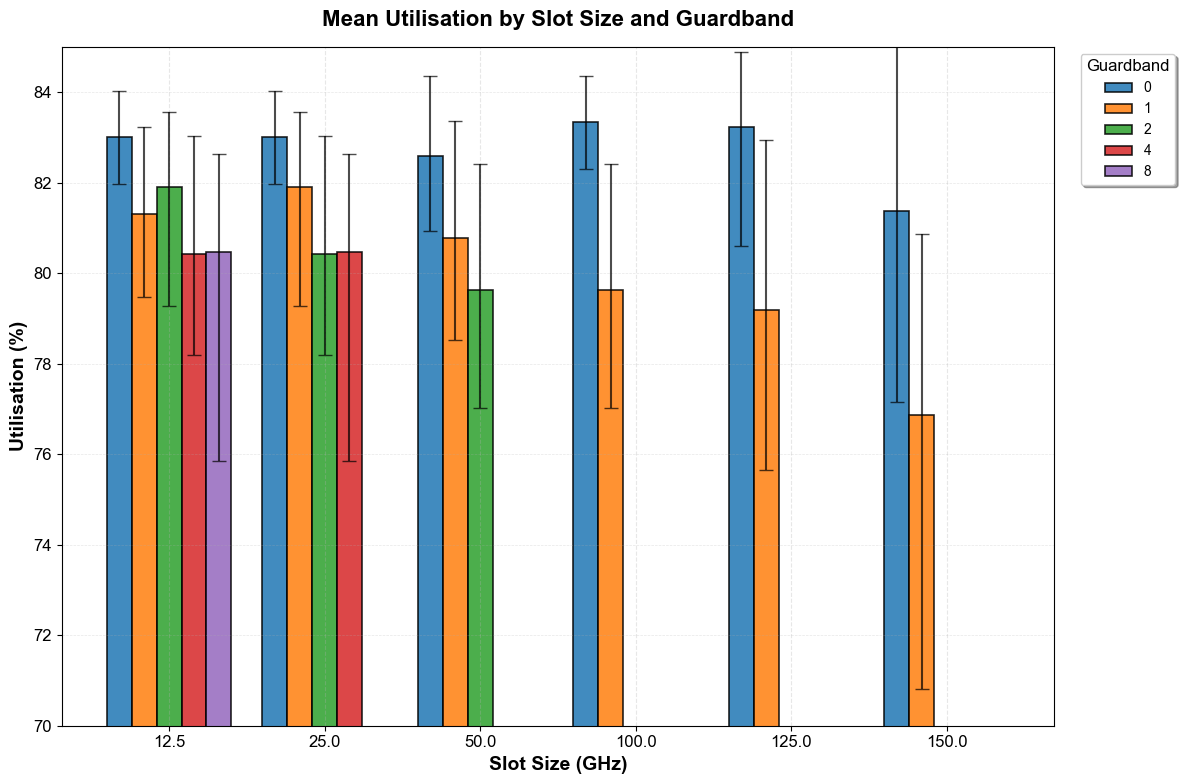

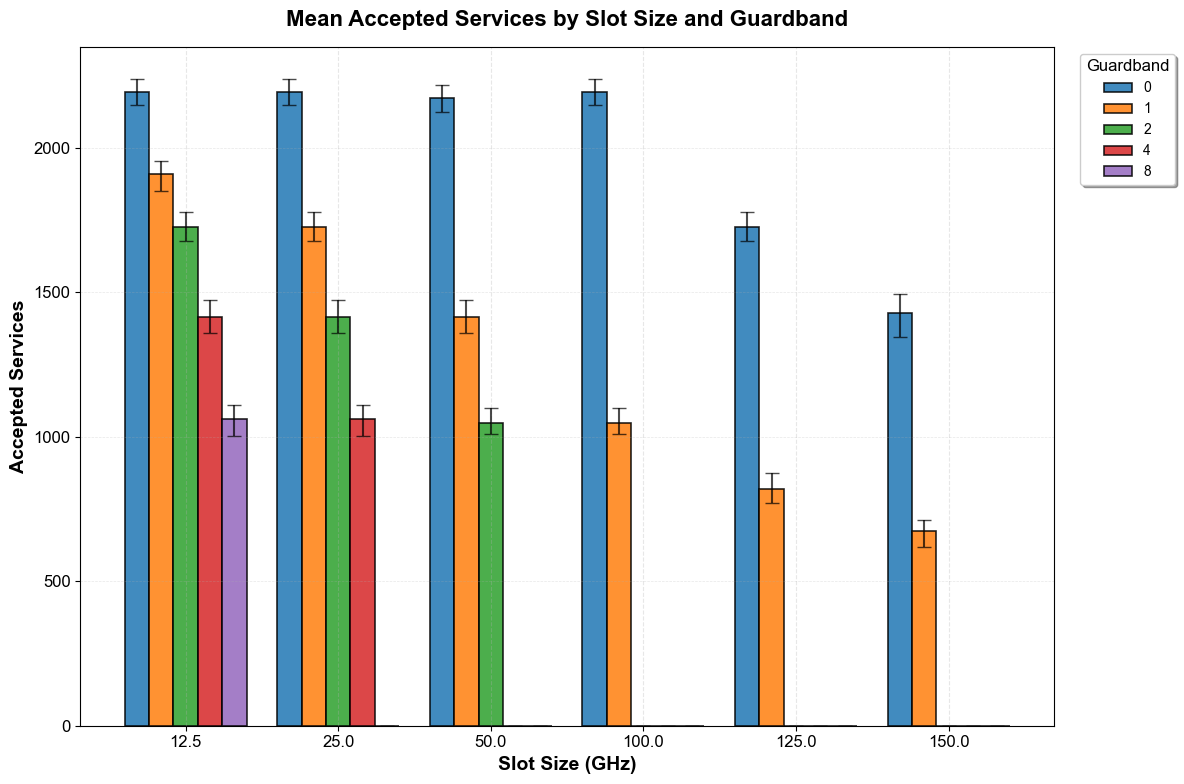


Utilisation Summary (in %):
Mean values:
guardband      0      1      2      4      8
slot_size                                   
12.5       83.01  81.32  81.90  80.43  80.46
25.0       83.01  81.90  80.43  80.46    NaN
50.0       82.58  80.77  79.62    NaN    NaN
100.0      83.34  79.62    NaN    NaN    NaN
125.0      83.24  79.18    NaN    NaN    NaN
150.0      81.38  76.86    NaN    NaN    NaN

Accepted Services Summary:
Mean values:
guardband       0       1       2       4       8
slot_size                                        
12.5       2191.0  1908.0  1726.0  1415.0  1061.0
25.0       2191.0  1726.0  1415.0  1061.0     NaN
50.0       2171.0  1415.0  1046.0     NaN     NaN
100.0      2191.0  1046.0     NaN     NaN     NaN
125.0      1726.0   820.0     NaN     NaN     NaN
150.0      1426.0   673.0     NaN     NaN     NaN


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
import matplotlib.patches as mpatches

# File path
filepath = '/Users/michaeldoherty/git/XLRON/experiment_data/ISRSGN2025/nsfnet_throughput_data.csv'

# Read the CSV
df = pd.read_csv(filepath)

# Convert throughput from Gbps to Pbps (multiply by 0.001)
df['throughput_episode_end_mean.mean'] = df['throughput_episode_end_mean.mean'] * 0.001
df['throughput_episode_end_mean.min'] = df['throughput_episode_end_mean.min'] * 0.001
df['throughput_episode_end_mean.max'] = df['throughput_episode_end_mean.max'] * 0.001

# Convert utilisation to percentage (multiply by 100)
df['utilisation_episode_end_mean.mean'] = df['utilisation_episode_end_mean.mean'] * 100
df['utilisation_episode_end_mean.min'] = df['utilisation_episode_end_mean.min'] * 100
df['utilisation_episode_end_mean.max'] = df['utilisation_episode_end_mean.max'] * 100

# Set up custom fonts and plot style
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']
rcParams['font.size'] = 12
rcParams['axes.titlesize'] = 16
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 11
rcParams['ytick.labelsize'] = 12
rcParams['legend.fontsize'] = 10
rcParams['figure.titlesize'] = 18
rcParams['lines.linewidth'] = 2.5
rcParams['axes.grid'] = True
rcParams['grid.alpha'] = 0.3
rcParams['grid.linestyle'] = '--'

# Get unique values and sort them
slot_sizes = sorted(df['slot_size'].unique())
guardbands = sorted(df['guardband'].unique())

# Define color palette for GUARDBANDS (for bar charts)
gb_color_palette = [
    '#1f77b4',  # blue
    '#ff7f0e',  # orange
    '#2ca02c',  # green
    '#d62728',  # red
    '#9467bd',  # purple
    '#8c564b',  # brown
    '#e377c2',  # pink
    '#7f7f7f',  # gray
    '#bcbd22',  # olive
    '#17becf'   # cyan
]
gb_color_map = dict(zip(guardbands, gb_color_palette[:len(guardbands)]))

# Define color palette for SLOT SIZES (for line plot)
slot_color_palette = [
    '#1f77b4',  # blue
    '#ff7f0e',  # orange
    '#2ca02c',  # green
    '#d62728',  # red
    '#9467bd',  # purple
    '#8c564b',  # brown
    '#e377c2',  # pink
    '#7f7f7f',  # gray
    '#bcbd22',  # olive
    '#17becf'   # cyan
]

if len(slot_sizes) > len(slot_color_palette):
    additional_colors = plt.cm.tab20(np.linspace(0, 1, len(slot_sizes) - len(slot_color_palette)))
    slot_color_palette.extend([plt.colors.rgb2hex(c) for c in additional_colors])

slot_color_map = dict(zip(slot_sizes, slot_color_palette[:len(slot_sizes)]))

# Define markers for line plot
markers = ['X', 'o', 's', '^', 'D', 'v', 'P', '*', 'h', '<']
marker_sizes = [12, 10, 10, 10, 10, 10, 10, 12, 10, 10]
marker_map = dict(zip(guardbands, markers[:len(guardbands)]))
size_map = dict(zip(guardbands, marker_sizes[:len(guardbands)]))

# PLOT 1: Throughput vs Launch Power (Line Plot) - in Pbps
plt.figure(figsize=(12, 8))

# Group by slot size first
for slot_size in slot_sizes:
    df_slot = df[df['slot_size'] == slot_size]

    for guardband in guardbands:
        df_gb = df_slot[df_slot['guardband'] == guardband]
        if not df_gb.empty:
            df_gb = df_gb.sort_values('launch_power')

            # Plot line
            plt.plot(df_gb['launch_power'],
                    df_gb['throughput_episode_end_mean.mean'],
                    color=slot_color_map[slot_size],
                    alpha=0.8,
                    linewidth=2)

            # Add shaded area
            plt.fill_between(df_gb['launch_power'],
                           df_gb['throughput_episode_end_mean.min'],
                           df_gb['throughput_episode_end_mean.max'],
                           color=slot_color_map[slot_size],
                           alpha=0.1)

# Add markers on top
for slot_size in slot_sizes:
    df_slot = df[df['slot_size'] == slot_size]

    for guardband in guardbands:
        df_gb = df_slot[df_slot['guardband'] == guardband]
        if not df_gb.empty:
            df_gb = df_gb.sort_values('launch_power')

            plt.plot(df_gb['launch_power'],
                    df_gb['throughput_episode_end_mean.mean'],
                    color=slot_color_map[slot_size],
                    marker=marker_map[guardband],
                    markersize=size_map[guardband],
                    markeredgewidth=1.5,
                    markeredgecolor='white',
                    linestyle='none',
                    alpha=0.9)

plt.xlabel('Launch Power (dBm)', fontweight='bold', fontsize=14)
plt.ylabel('Network Throughput (Tbps)', fontweight='bold', fontsize=14)
plt.title('Mean Throughput vs Launch Power', fontweight='bold', fontsize=16, pad=15)
plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor', alpha=0.1, linestyle=':', linewidth=0.5)

# Create custom legends for line plot
slot_handles = [mpatches.Patch(color=slot_color_map[slot_size], label=f'{slot_size} GHz')
                for slot_size in slot_sizes[:6]]
gb_handles = [plt.Line2D([0], [0], marker=marker_map[guardband], color='gray',
                        linewidth=0, markersize=10, markeredgewidth=1.5,
                        markeredgecolor='white', label=f'{guardband}')
              for guardband in guardbands[:4]]

legend1 = plt.legend(handles=slot_handles, loc='upper left', bbox_to_anchor=(1.02, 1),
                     title='Slot Size', frameon=True, fancybox=True, shadow=True)
legend2 = plt.legend(handles=gb_handles, loc='upper left', bbox_to_anchor=(1.02, 0.6),
                     title='Guardband', frameon=True, fancybox=True, shadow=True)
plt.gca().add_artist(legend1)

plt.tight_layout()
plt.show()

# PLOT 2: Utilisation (Bar Chart with Error Bars) - in percentage
# Get average, min, and max utilisation for each slot_size/guardband combination
util_data = df.groupby(['slot_size', 'guardband']).agg({
    'utilisation_episode_end_mean.mean': 'mean',
    'utilisation_episode_end_mean.min': 'mean',
    'utilisation_episode_end_mean.max': 'mean'
}).reset_index()

plt.figure(figsize=(12, 8))

# Create x positions for bars
n_slots = len(slot_sizes)
n_gb = len(guardbands)
bar_width = 0.8 / n_gb
x_base = np.arange(n_slots)

# Plot bars for each guardband
for i, guardband in enumerate(guardbands):
    gb_data = util_data[util_data['guardband'] == guardband]

    # Ensure data is aligned with slot_sizes order
    values = []
    mins = []
    maxs = []
    for slot in slot_sizes:
        slot_data = gb_data[gb_data['slot_size'] == slot]
        if len(slot_data) > 0:
            values.append(slot_data['utilisation_episode_end_mean.mean'].values[0])
            mins.append(slot_data['utilisation_episode_end_mean.min'].values[0])
            maxs.append(slot_data['utilisation_episode_end_mean.max'].values[0])
        else:
            values.append(0)
            mins.append(0)
            maxs.append(0)

    # Calculate error bar sizes
    errors = [[values[j] - mins[j] for j in range(len(values))],
              [maxs[j] - values[j] for j in range(len(values))]]

    x_pos = x_base + i * bar_width

    bars = plt.bar(x_pos, values, bar_width,
                    color=gb_color_map[guardband],
                    edgecolor='black',
                    linewidth=1.2,
                    alpha=0.85,
                    label=f'{guardband}',
                    yerr=errors,
                    capsize=5,
                    error_kw={'linewidth': 1.5, 'alpha': 0.7})

plt.xlabel('Slot Size (GHz)', fontweight='bold', fontsize=14)
plt.ylabel('Utilisation (%)', fontweight='bold', fontsize=14)
plt.title('Mean Utilisation by Slot Size and Guardband', fontweight='bold', fontsize=16, pad=15)
plt.xticks(x_base + bar_width * (n_gb-1) / 2, [f'{s}' for s in slot_sizes], fontsize=12)
plt.grid(True, axis='y', alpha=0.3, linestyle='--', linewidth=0.5)
plt.ylim(70, 85)  # Adjusted for percentage scale

# Single legend for guardbands
plt.legend(title='Guardband', frameon=True, fancybox=True, shadow=True,
           loc='upper left', bbox_to_anchor=(1.02, 1))

plt.tight_layout()
plt.show()

# PLOT 3: Accepted Services (Bar Chart with Error Bars)
# Get average, min, and max accepted services for each slot_size/guardband combination
services_data = df.groupby(['slot_size', 'guardband']).agg({
    'accepted_services_episode_end_mean.mean': 'mean',
    'accepted_services_episode_end_mean.min': 'mean',
    'accepted_services_episode_end_mean.max': 'mean'
}).reset_index()

plt.figure(figsize=(12, 8))

# Plot bars for each guardband
for i, guardband in enumerate(guardbands):
    gb_data = services_data[services_data['guardband'] == guardband]

    # Ensure data is aligned with slot_sizes order
    values = []
    mins = []
    maxs = []
    for slot in slot_sizes:
        slot_data = gb_data[gb_data['slot_size'] == slot]
        if len(slot_data) > 0:
            values.append(slot_data['accepted_services_episode_end_mean.mean'].values[0])
            mins.append(slot_data['accepted_services_episode_end_mean.min'].values[0])
            maxs.append(slot_data['accepted_services_episode_end_mean.max'].values[0])
        else:
            values.append(0)
            mins.append(0)
            maxs.append(0)

    # Calculate error bar sizes
    errors = [[values[j] - mins[j] for j in range(len(values))],
              [maxs[j] - values[j] for j in range(len(values))]]

    x_pos = x_base + i * bar_width

    bars = plt.bar(x_pos, values, bar_width,
                    color=gb_color_map[guardband],
                    edgecolor='black',
                    linewidth=1.2,
                    alpha=0.85,
                    label=f'{guardband}',
                    yerr=errors,
                    capsize=5,
                    error_kw={'linewidth': 1.5, 'alpha': 0.7})

plt.xlabel('Slot Size (GHz)', fontweight='bold', fontsize=14)
plt.ylabel('Accepted Services', fontweight='bold', fontsize=14)
plt.title('Mean Accepted Services by Slot Size and Guardband', fontweight='bold', fontsize=16, pad=15)
plt.xticks(x_base + bar_width * (n_gb-1) / 2, [f'{s}' for s in slot_sizes], fontsize=12)
plt.grid(True, axis='y', alpha=0.3, linestyle='--', linewidth=0.5)

# Single legend for guardbands
plt.legend(title='Guardband', frameon=True, fancybox=True, shadow=True,
           loc='upper left', bbox_to_anchor=(1.02, 1))

plt.tight_layout()
plt.show()

# Print summary of the bar chart data
print("\nUtilisation Summary (in %):")
util_pivot = util_data.pivot(index='slot_size', columns='guardband', values='utilisation_episode_end_mean.mean')
print("Mean values:")
print(util_pivot.round(2))

print("\nAccepted Services Summary:")
services_pivot = services_data.pivot(index='slot_size', columns='guardband', values='accepted_services_episode_end_mean.mean')
print("Mean values:")
print(services_pivot.round(0))